In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# load the dataset as pickle file
data = pd.read_pickle('../data/survey_data_with_preparedness.pkl')

# Define preparedness variables (our target)
preparedness_vars = ['es_fgen', 'el_lgen']  # Fast choice and Likert versions

# Define emotional predictors 
emotional_fast = [col for col in data.columns if col.startswith('es_') and col != 'es_fgen']
emotional_likert = [col for col in data.columns if col.startswith('el_') and col != 'el_lgen']

# Define workplace predictors
workplace_fast = [col for col in data.columns if col.startswith('wfs_')]
workplace_likert = [col for col in data.columns if col.startswith('wfl_')]

print(f"Emotional fast choice variables: {len(emotional_fast)}")
print(f"Emotional Likert variables: {len(emotional_likert)}")
print(f"Workplace fast choice variables: {len(workplace_fast)}")
print(f"Workplace Likert variables: {len(workplace_likert)}")

Emotional fast choice variables: 14
Emotional Likert variables: 14
Workplace fast choice variables: 11
Workplace Likert variables: 11


In [3]:
# Enhanced name mappings with symbols and cleaner labels
emotional_names = {
    'es_fgen': '★ Ready for next step',
    'es_ftra_des': '★ Want new start', 
    'es_ftra_aut': '★ Freedom to change',
    'es_fcnt_com': '★ Comfortable where I am',
    'es_fcnt_psy': '★ Voice is heard',
    'es_fcon_soc': '★ Others influence decisions',
    'es_fbal_anx': '★ Anxious about change',
    'es_fres_fin': '★ Financially motivated',
    'es_fcont_imp': '★ Believe in myself',
    'es_fjou_opt': '★ Optimistic about future',
    'es_fcon_inc': '★ Feel included',
    'es_fbal_sat': '★ Happy where I am',
    'es_fres_ski': '★ Skills to progress',
    'es_fcont_con': '★ Control next step',
    'es_fjou_pro': '★ Set myself goals',
    'el_lgen': '★ Ready for next step (L)',
    'el_ltra_des': '★ Want new start (L)',
    'el_ltra_aut': '★ Freedom to change (L)', 
    'el_lcnt_com': '★ Comfortable where I am (L)',
    'el_lcnt_psy': '★ Voice is heard (L)',
    'el_lcon_soc': '★ Others influence decisions (L)',
    'el_lbal_anx': '★ Anxious about change (L)',
    'el_lres_fin': '★ Financially motivated (L)',
    'el_lcont_imp': '★ Believe in myself (L)',
    'el_ljou_opt': '★ Optimistic about future (L)',
    'el_lcon_inc': '★ Feel included (L)',
    'el_lbal_sat': '★ Happy where I am (L)',
    'el_lres_ski': '★ Skills to progress (L)',
    'el_lcont_con': '★ Control next step (L)',
    'el_ljou_pro': '★ Set myself goals (L)'
}

workplace_names = {
    'wfs_fuse_skills': '◆ Can use skills',
    'wfs_flearn_dev': '◆ Learning opportunities',
    'wfs_fcarprom': '◆ Can grow here',
    'wfs_fmean_full': '◆ Job meaningful',
    'wfs_fpoorman': '◆ Manager is poor',
    'wfs_ftoxic': '◆ Culture is toxic',
    'wfs_fexcess_wk': '◆ Working too hard',
    'wfs_fcollea': '◆ Don\'t get along with colleagues',
    'wfs_fwellcomp': '◆ Well compensated',
    'wfs_ffin_fair': '◆ Salary unfair vs colleagues',
    'wfs_fenjhyb': '◆ Enjoy hybrid working',
    'wfl_luse_skills': '◆ Can use skills (L)',
    'wfl_llearn_dev': '◆ Learning opportunities (L)',
    'wfl_lcarprom_d': '◆ Can grow here (L)',
    'wfl_lmean_full': '◆ Job meaningful (L)',
    'wfl_lpoorman': '◆ Manager is poor (L)',
    'wfl_ltoxic': '◆ Culture is toxic (L)',
    'wfl_lexcess_wk': '◆ Working too hard (L)',
    'wfl_lcollea': '◆ Don\'t get along with colleagues (L)',
    'wfl_lwellcomp': '◆ Well compensated (L)',
    'wfl_lfin_lair': '◆ Salary unfair vs colleagues (L)',
    'wfl_lenjhyb': '◆ Enjoy hybrid working (L)'
}

# Combine all names
all_names = {**emotional_names, **workplace_names}

In [4]:
# Calculate correlations with both preparedness measures
all_predictors = emotional_fast + emotional_likert + workplace_fast + workplace_likert

# Correlations with fast choice preparedness
prep_corr_fast = data[all_predictors + ['es_fgen']].corr()['es_fgen'].drop('es_fgen')

# Correlations with Likert preparedness  
prep_corr_likert = data[all_predictors + ['el_lgen']].corr()['el_lgen'].drop('el_lgen')

# Create summary dataframe
corr_summary = pd.DataFrame({
    'Variable': prep_corr_fast.index,
    'Corr_Fast_Choice': prep_corr_fast.values,
    'Corr_Likert': prep_corr_likert.values,
    'Avg_Correlation': (prep_corr_fast.values + prep_corr_likert.values) / 2,
    'Variable_Type': ['Emotional' if var.startswith(('es_', 'el_')) else 'Workplace' 
                      for var in prep_corr_fast.index],
    'Response_Type': ['Fast_Choice' if var.startswith(('es_', 'wfs_')) else 'Likert' 
                      for var in prep_corr_fast.index]
})

# Add readable names
corr_summary['Readable_Name'] = corr_summary['Variable'].map(all_names)

# Sort by average correlation strength
corr_summary['Abs_Avg_Correlation'] = corr_summary['Avg_Correlation'].abs()
corr_summary = corr_summary.sort_values('Abs_Avg_Correlation', ascending=False)

print("Top 10 Most Predictive Factors:")
print(corr_summary[['Readable_Name', 'Variable_Type', 'Avg_Correlation']].head(10))

Top 10 Most Predictive Factors:
                            Readable_Name Variable_Type  Avg_Correlation
25               ★ Skills to progress (L)     Emotional         0.452266
21                ★ Believe in myself (L)     Emotional         0.417198
26                ★ Freedom to change (L)     Emotional         0.415365
23                 ★ Set myself goals (L)     Emotional         0.404609
20                ★ Control next step (L)     Emotional         0.401560
17                   ★ Voice is heard (L)     Emotional         0.357740
7                     ★ Believe in myself     Emotional         0.341452
22          ★ Optimistic about future (L)     Emotional         0.334271
40  ◆ Don't get along with colleagues (L)     Workplace        -0.313522
18                    ★ Feel included (L)     Emotional         0.311394


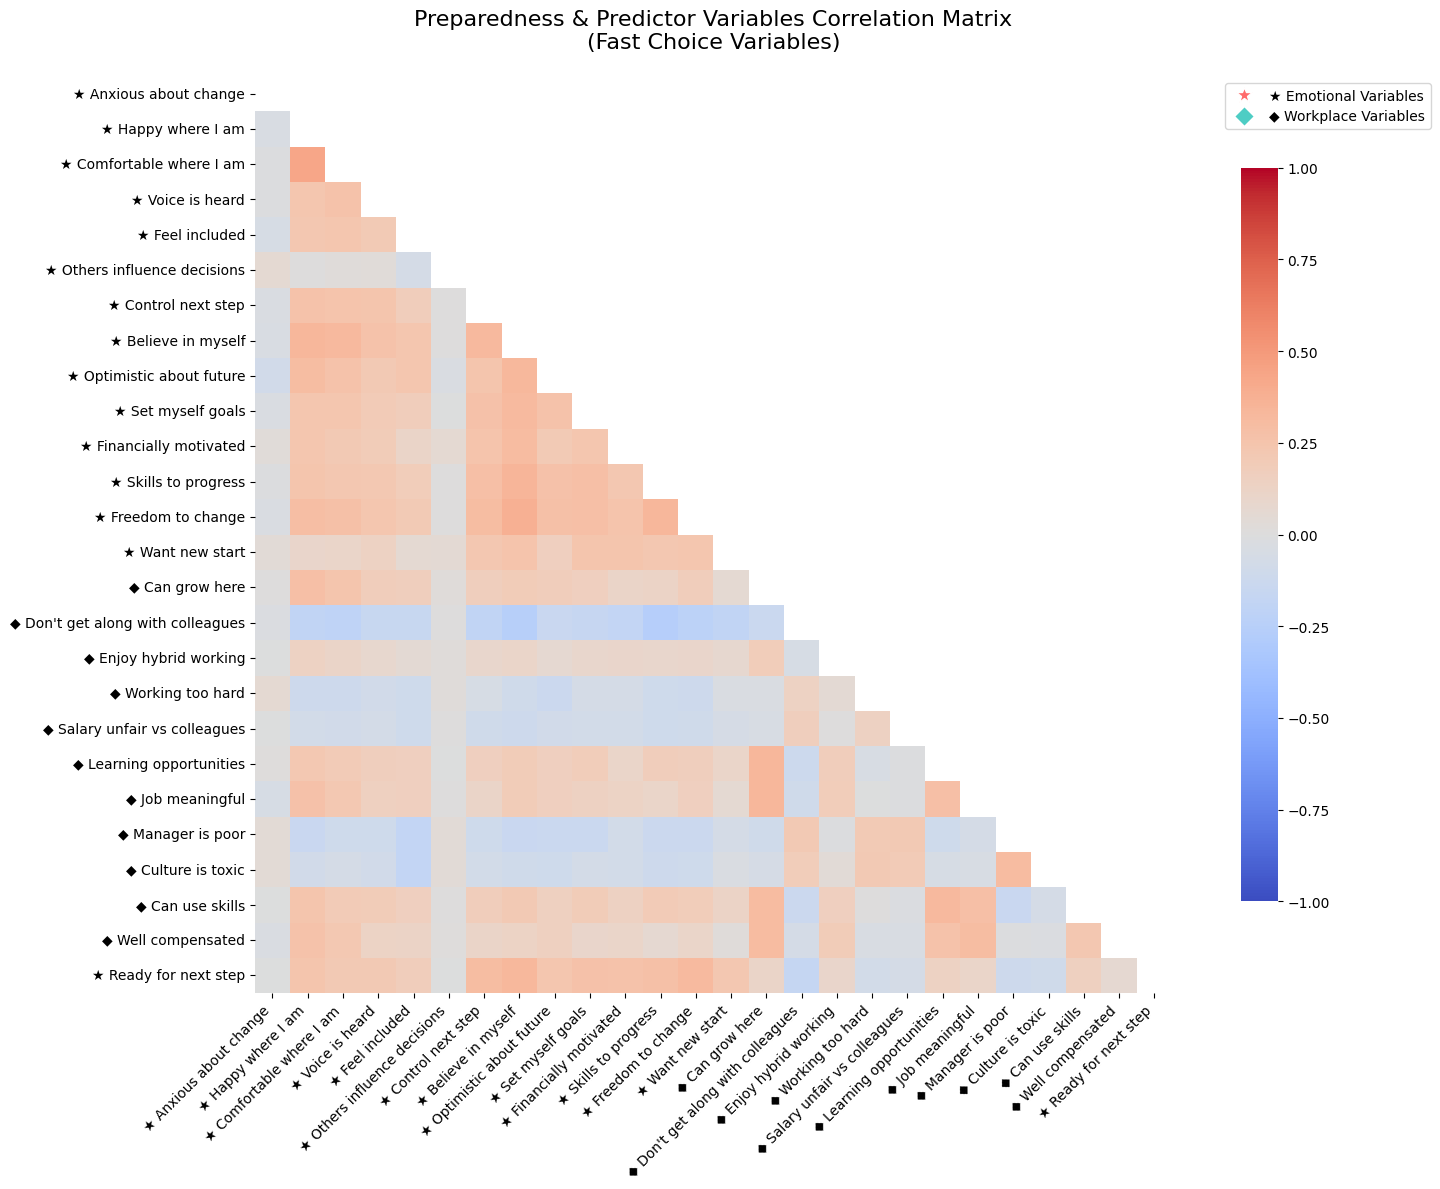

In [6]:
# Create correlation matrix for visualization
predictor_vars = emotional_fast + workplace_fast  # Focus on fast choice for clarity
prep_corr_matrix = data[predictor_vars + ['es_fgen']].corr()

# Rename for visualization
prep_corr_renamed = prep_corr_matrix.rename(index=all_names, columns=all_names)

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(prep_corr_renamed, dtype=bool))  # Show only lower triangle

sns.heatmap(prep_corr_renamed, annot=False, cmap="coolwarm", square=True, 
           cbar_kws={"shrink": .8}, vmin=-1, vmax=1, ax=ax, mask=mask)

ax.set_title("Preparedness & Predictor Variables Correlation Matrix\n(Fast Choice Variables)", 
             fontsize=16, pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='#FF6B6B', 
               markersize=12, label='★ Emotional Variables'),
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#4ECDC4', 
               markersize=10, label='◆ Workplace Variables')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [7]:
# Use Random Forest to identify most important predictors
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Prepare data - remove missing values
analysis_data = data[all_predictors + ['es_fgen']].dropna()
X = analysis_data[all_predictors]
y = analysis_data['es_fgen']

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Variable': all_predictors,
    'Importance': rf.feature_importances_,
    'Variable_Type': ['Emotional' if var.startswith(('es_', 'el_')) else 'Workplace' 
                      for var in all_predictors],
    'Response_Type': ['Fast_Choice' if var.startswith(('es_', 'wfs_')) else 'Likert' 
                      for var in all_predictors]
})

feature_importance['Readable_Name'] = feature_importance['Variable'].map(all_names)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print(f"Random Forest R² Score: {rf.score(X, y):.3f}")
print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance[['Readable_Name', 'Variable_Type', 'Importance']].head(10))

Random Forest R² Score: 0.890

Top 10 Most Important Features (Random Forest):
              Readable_Name Variable_Type  Importance
7       ★ Believe in myself     Emotional    0.098450
12      ★ Freedom to change     Emotional    0.067969
6       ★ Control next step     Emotional    0.055875
10  ★ Financially motivated     Emotional    0.039552
9        ★ Set myself goals     Emotional    0.037715
13         ★ Want new start     Emotional    0.037394
11     ★ Skills to progress     Emotional    0.036089
3          ★ Voice is heard     Emotional    0.030323
4           ★ Feel included     Emotional    0.027725
1        ★ Happy where I am     Emotional    0.027443


Predictive Power by Variable Type:
                            Abs_Avg_Correlation              Avg_Correlation  \
                                           mean    std count            mean   
Variable_Type Response_Type                                                    
Emotional     Fast_Choice                 0.227  0.099    14           0.221   
              Likert                      0.315  0.097    14           0.266   
Workplace     Fast_Choice                 0.119  0.037    11           0.024   
              Likert                      0.182  0.069    11          -0.001   

                                           
                               min    max  
Variable_Type Response_Type                
Emotional     Fast_Choice   -0.026  0.341  
              Likert        -0.174  0.452  
Workplace     Fast_Choice   -0.178  0.164  
              Likert        -0.314  0.234  


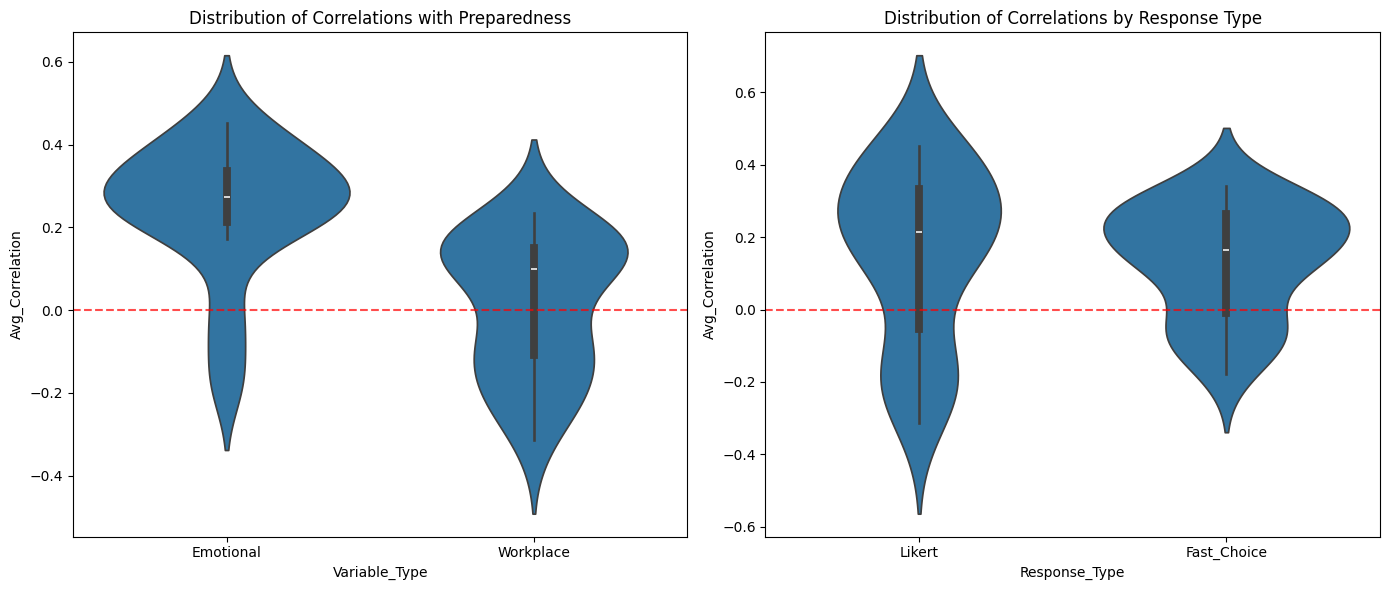

In [8]:
# Compare predictive power by variable type
type_summary = corr_summary.groupby(['Variable_Type', 'Response_Type']).agg({
    'Abs_Avg_Correlation': ['mean', 'std', 'count'],
    'Avg_Correlation': ['mean', 'min', 'max']
}).round(3)

print("Predictive Power by Variable Type:")
print(type_summary)

# Create violin plot comparing distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation distribution by variable type
sns.violinplot(data=corr_summary, x='Variable_Type', y='Avg_Correlation', ax=axes[0])
axes[0].set_title('Distribution of Correlations with Preparedness')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Correlation distribution by response type
sns.violinplot(data=corr_summary, x='Response_Type', y='Avg_Correlation', ax=axes[1])
axes[1].set_title('Distribution of Correlations by Response Type')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
# Generate key insights
print("=== KEY INSIGHTS: MOST PREDICTIVE FACTORS OF CAREER PREPAREDNESS ===\n")

print("1. TOP EMOTIONAL PREDICTORS:")
top_emotional = corr_summary[corr_summary['Variable_Type'] == 'Emotional'].head(5)
for _, row in top_emotional.iterrows():
    print(f"   • {row['Readable_Name']}: r = {row['Avg_Correlation']:.3f}")

print("\n2. TOP WORKPLACE PREDICTORS:")
top_workplace = corr_summary[corr_summary['Variable_Type'] == 'Workplace'].head(5)
for _, row in top_workplace.iterrows():
    print(f"   • {row['Readable_Name']}: r = {row['Avg_Correlation']:.3f}")

print(f"\n3. OVERALL STRONGEST PREDICTOR:")
strongest = corr_summary.iloc[0]
print(f"   • {strongest['Readable_Name']}")
print(f"   • Correlation: {strongest['Avg_Correlation']:.3f}")
print(f"   • Type: {strongest['Variable_Type']}")

print(f"\n4. RESPONSE TYPE COMPARISON:")
fast_choice_mean = corr_summary[corr_summary['Response_Type'] == 'Fast_Choice']['Abs_Avg_Correlation'].mean()
likert_mean = corr_summary[corr_summary['Response_Type'] == 'Likert']['Abs_Avg_Correlation'].mean()
print(f"   • Fast Choice average |correlation|: {fast_choice_mean:.3f}")
print(f"   • Likert average |correlation|: {likert_mean:.3f}")

print(f"\n5. VARIABLE TYPE COMPARISON:")
emotional_mean = corr_summary[corr_summary['Variable_Type'] == 'Emotional']['Abs_Avg_Correlation'].mean()
workplace_mean = corr_summary[corr_summary['Variable_Type'] == 'Workplace']['Abs_Avg_Correlation'].mean()
print(f"   • Emotional variables average |correlation|: {emotional_mean:.3f}")
print(f"   • Workplace variables average |correlation|: {workplace_mean:.3f}")

=== KEY INSIGHTS: MOST PREDICTIVE FACTORS OF CAREER PREPAREDNESS ===

1. TOP EMOTIONAL PREDICTORS:
   • ★ Skills to progress (L): r = 0.452
   • ★ Believe in myself (L): r = 0.417
   • ★ Freedom to change (L): r = 0.415
   • ★ Set myself goals (L): r = 0.405
   • ★ Control next step (L): r = 0.402

2. TOP WORKPLACE PREDICTORS:
   • ◆ Don't get along with colleagues (L): r = -0.314
   • ◆ Can use skills (L): r = 0.234
   • ◆ Culture is toxic (L): r = -0.224
   • ◆ Manager is poor (L): r = -0.221
   • ◆ Salary unfair vs colleagues (L): r = -0.191

3. OVERALL STRONGEST PREDICTOR:
   • ★ Skills to progress (L)
   • Correlation: 0.452
   • Type: Emotional

4. RESPONSE TYPE COMPARISON:
   • Fast Choice average |correlation|: 0.179
   • Likert average |correlation|: 0.256

5. VARIABLE TYPE COMPARISON:
   • Emotional variables average |correlation|: 0.271
   • Workplace variables average |correlation|: 0.150


#### Part B: Comparing implicit vs. explicit global drivers of preparedness

In [10]:
# Create matched pairs of fast choice (implicit) vs Likert (explicit) variables
emotional_pairs = [
    ('es_ftra_des', 'el_ltra_des', 'Want new start'),
    ('es_ftra_aut', 'el_ltra_aut', 'Freedom to change'),
    ('es_fcnt_com', 'el_lcnt_com', 'Comfortable where I am'),
    ('es_fcnt_psy', 'el_lcnt_psy', 'Voice is heard'),
    ('es_fcon_soc', 'el_lcon_soc', 'Others influence decisions'),
    ('es_fbal_anx', 'el_lbal_anx', 'Anxious about change'),
    ('es_fres_fin', 'el_lres_fin', 'Financially motivated'),
    ('es_fcont_imp', 'el_lcont_imp', 'Believe in myself'),
    ('es_fjou_opt', 'el_ljou_opt', 'Optimistic about future'),
    ('es_fcon_inc', 'el_lcon_inc', 'Feel included'),
    ('es_fbal_sat', 'el_lbal_sat', 'Happy where I am'),
    ('es_fres_ski', 'el_lres_ski', 'Skills to progress'),
    ('es_fcont_con', 'el_lcont_con', 'Control next step'),
    ('es_fjou_pro', 'el_ljou_pro', 'Set myself goals')
]

workplace_pairs = [
    ('wfs_fuse_skills', 'wfl_luse_skills', 'Can use skills'),
    ('wfs_flearn_dev', 'wfl_llearn_dev', 'Learning opportunities'),
    ('wfs_fcarprom', 'wfl_lcarprom_d', 'Can grow here'),
    ('wfs_fmean_full', 'wfl_lmean_full', 'Job meaningful'),
    ('wfs_fpoorman', 'wfl_lpoorman', 'Manager is poor'),
    ('wfs_ftoxic', 'wfl_ltoxic', 'Culture is toxic'),
    ('wfs_fexcess_wk', 'wfl_lexcess_wk', 'Working too hard'),
    ('wfs_fcollea', 'wfl_lcollea', 'Don\'t get along with colleagues'),
    ('wfs_fwellcomp', 'wfl_lwellcomp', 'Well compensated'),
    ('wfs_ffin_fair', 'wfl_lfin_lair', 'Salary unfair vs colleagues'),
    ('wfs_fenjhyb', 'wfl_lenjhyb', 'Enjoy hybrid working')
]

all_pairs = emotional_pairs + workplace_pairs

print(f"Emotional factor pairs: {len(emotional_pairs)}")
print(f"Workplace factor pairs: {len(workplace_pairs)}")
print(f"Total matched pairs: {len(all_pairs)}")

Emotional factor pairs: 14
Workplace factor pairs: 11
Total matched pairs: 25


In [11]:
# Calculate correlations for each response type with preparedness
correlation_comparison = []

for fast_var, likert_var, label in all_pairs:
    # Correlations with both preparedness measures
    fast_prep_corr = data[[fast_var, 'es_fgen']].corr().iloc[0,1]
    likert_prep_corr = data[[likert_var, 'el_lgen']].corr().iloc[0,1]
    
    # Cross-correlations between response types
    cross_corr = data[[fast_var, likert_var]].corr().iloc[0,1]
    
    # Variable type
    var_type = 'Emotional' if fast_var.startswith('es_') else 'Workplace'
    
    correlation_comparison.append({
        'Factor': label,
        'Variable_Type': var_type,
        'Fast_Choice_Var': fast_var,
        'Likert_Var': likert_var,
        'Fast_Choice_Corr': fast_prep_corr,
        'Likert_Corr': likert_prep_corr,
        'Cross_Correlation': cross_corr,
        'Correlation_Diff': abs(fast_prep_corr - likert_prep_corr),
        'Stronger_Predictor': 'Fast_Choice' if abs(fast_prep_corr) > abs(likert_prep_corr) else 'Likert'
    })

comparison_df = pd.DataFrame(correlation_comparison)
comparison_df = comparison_df.sort_values('Correlation_Diff', ascending=False)

print("Top 10 Factors with Largest Implicit vs Explicit Differences:")
print(comparison_df[['Factor', 'Variable_Type', 'Fast_Choice_Corr', 'Likert_Corr', 
                    'Correlation_Diff', 'Stronger_Predictor']].head(10))

Top 10 Factors with Largest Implicit vs Explicit Differences:
                             Factor Variable_Type  Fast_Choice_Corr  \
11               Skills to progress     Emotional          0.278051   
13                 Set myself goals     Emotional          0.271496   
5              Anxious about change     Emotional         -0.006174   
3                    Voice is heard     Emotional          0.218442   
21  Don't get along with colleagues     Workplace         -0.166493   
1                 Freedom to change     Emotional          0.313628   
4        Others influence decisions     Emotional         -0.006650   
9                     Feel included     Emotional          0.177463   
7                 Believe in myself     Emotional          0.332787   
12                Control next step     Emotional          0.302094   

    Likert_Corr  Correlation_Diff Stronger_Predictor  
11     0.581450          0.303399             Likert  
13     0.539476          0.267980             

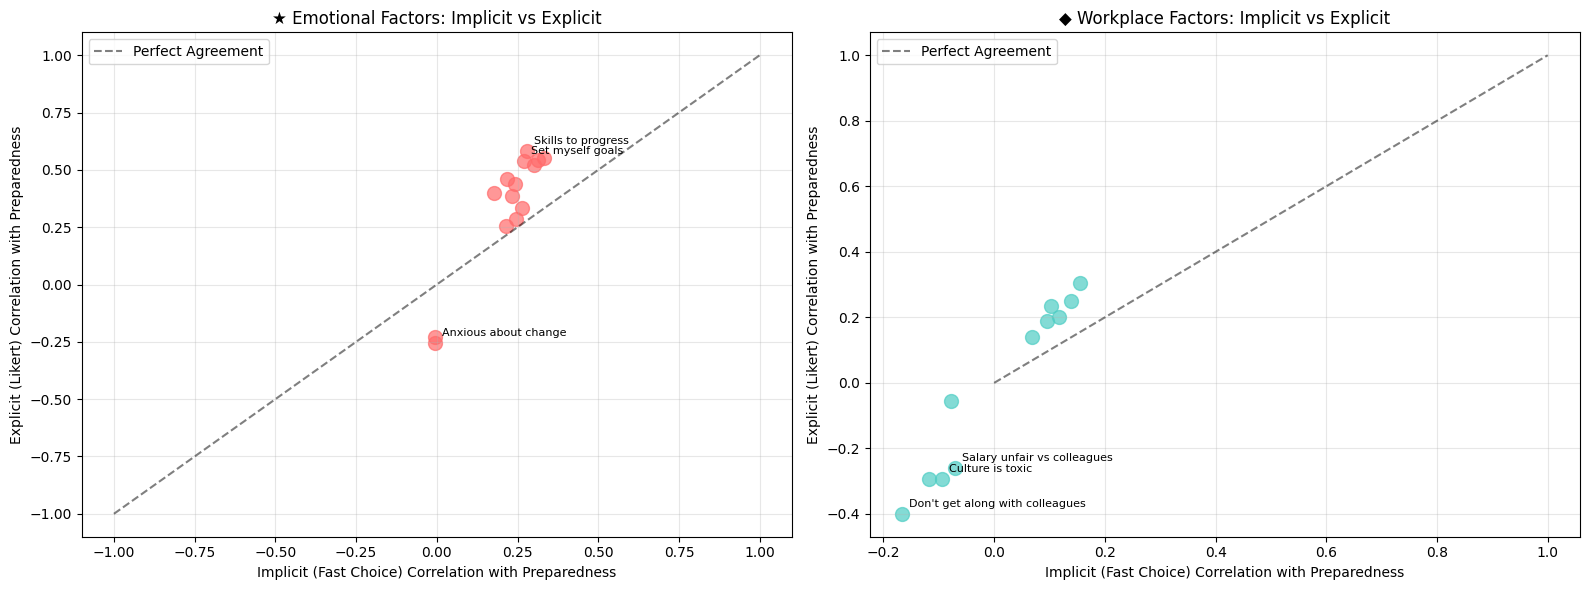

In [12]:
# Create scatter plot comparing implicit vs explicit correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Emotional factors
emotional_data = comparison_df[comparison_df['Variable_Type'] == 'Emotional']
axes[0].scatter(emotional_data['Fast_Choice_Corr'], emotional_data['Likert_Corr'], 
               alpha=0.7, s=100, color='#FF6B6B')
axes[0].plot([-1, 1], [-1, 1], 'k--', alpha=0.5, label='Perfect Agreement')
axes[0].set_xlabel('Implicit (Fast Choice) Correlation with Preparedness')
axes[0].set_ylabel('Explicit (Likert) Correlation with Preparedness')
axes[0].set_title('★ Emotional Factors: Implicit vs Explicit')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Add annotations for most divergent points
for _, row in emotional_data.head(3).iterrows():
    axes[0].annotate(row['Factor'], 
                    (row['Fast_Choice_Corr'], row['Likert_Corr']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

# Workplace factors
workplace_data = comparison_df[comparison_df['Variable_Type'] == 'Workplace']
axes[1].scatter(workplace_data['Fast_Choice_Corr'], workplace_data['Likert_Corr'], 
               alpha=0.7, s=100, color='#4ECDC4')
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect Agreement')
axes[1].set_xlabel('Implicit (Fast Choice) Correlation with Preparedness')
axes[1].set_ylabel('Explicit (Likert) Correlation with Preparedness')
axes[1].set_title('◆ Workplace Factors: Implicit vs Explicit')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Add annotations for most divergent points
for _, row in workplace_data.head(3).iterrows():
    axes[1].annotate(row['Factor'], 
                    (row['Fast_Choice_Corr'], row['Likert_Corr']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

Cross-Correlation Analysis (How well do implicit & explicit measures agree?):
              Cross_Correlation                      Correlation_Diff         \
                           mean    std    min    max             mean    std   
Variable_Type                                                                  
Emotional                 0.373  0.073  0.195  0.490            0.191  0.084   
Workplace                 0.355  0.055  0.250  0.463            0.133  0.063   

                             
                 min    max  
Variable_Type                
Emotional      0.040  0.303  
Workplace      0.024  0.233  


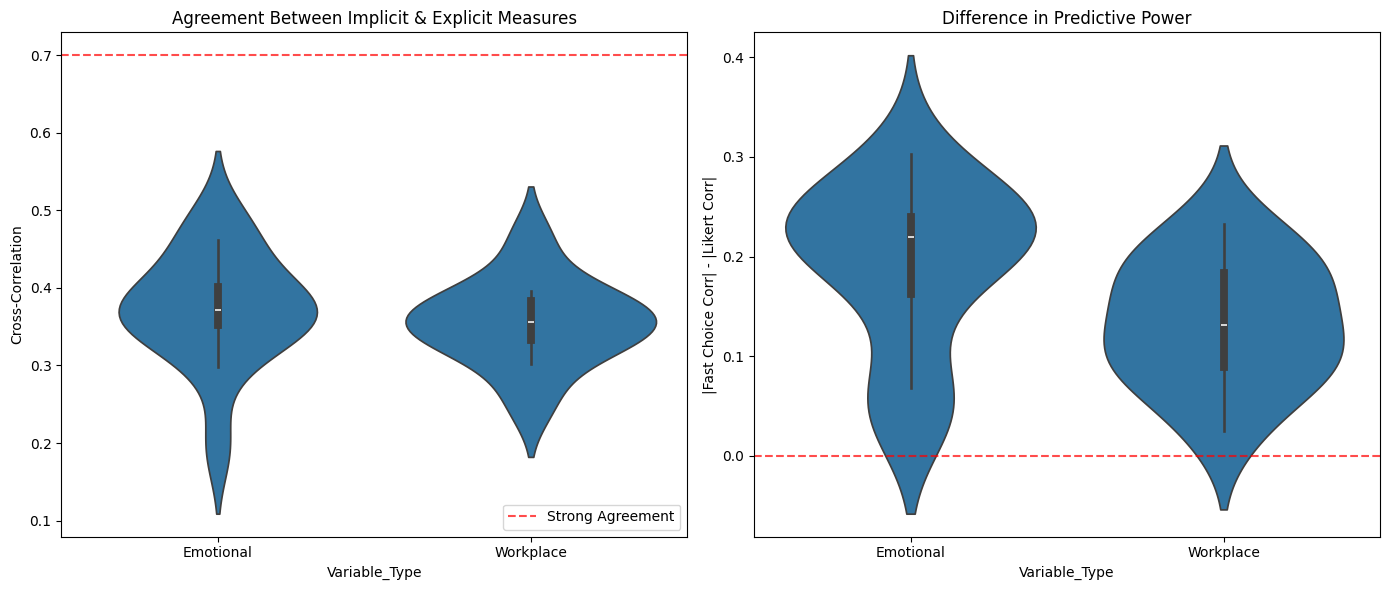

In [13]:
# Examine how well implicit and explicit measures agree with each other
cross_corr_analysis = comparison_df.groupby('Variable_Type').agg({
    'Cross_Correlation': ['mean', 'std', 'min', 'max'],
    'Correlation_Diff': ['mean', 'std', 'min', 'max']
}).round(3)

print("Cross-Correlation Analysis (How well do implicit & explicit measures agree?):")
print(cross_corr_analysis)

# Create violin plot of cross-correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Cross-correlations by variable type
sns.violinplot(data=comparison_df, x='Variable_Type', y='Cross_Correlation', ax=axes[0])
axes[0].set_title('Agreement Between Implicit & Explicit Measures')
axes[0].set_ylabel('Cross-Correlation')
axes[0].axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='Strong Agreement')
axes[0].legend()

# Correlation differences by variable type
sns.violinplot(data=comparison_df, x='Variable_Type', y='Correlation_Diff', ax=axes[1])
axes[1].set_title('Difference in Predictive Power')
axes[1].set_ylabel('|Fast Choice Corr| - |Likert Corr|')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
# Factors where implicit and explicit measures tell different stories
high_divergence = comparison_df[comparison_df['Correlation_Diff'] > 0.1]
low_agreement = comparison_df[comparison_df['Cross_Correlation'] < 0.5]

print("=== FACTORS WITH HIGH IMPLICIT/EXPLICIT DIVERGENCE ===")
print("(Where fast choice and Likert give different signals about preparedness)\n")

if len(high_divergence) > 0:
    print("High Divergence Factors:")
    for _, row in high_divergence.iterrows():
        print(f"• {row['Factor']} ({row['Variable_Type']})")
        print(f"  Fast Choice correlation: {row['Fast_Choice_Corr']:.3f}")
        print(f"  Likert correlation: {row['Likert_Corr']:.3f}")
        print(f"  Difference: {row['Correlation_Diff']:.3f}")
        print(f"  Stronger predictor: {row['Stronger_Predictor']}")
        print()

print("=== FACTORS WITH LOW IMPLICIT/EXPLICIT AGREEMENT ===")
print("(Where people respond differently on fast choice vs Likert)\n")

if len(low_agreement) > 0:
    print("Low Agreement Factors:")
    for _, row in low_agreement.iterrows():
        print(f"• {row['Factor']} ({row['Variable_Type']})")
        print(f"  Cross-correlation: {row['Cross_Correlation']:.3f}")
        print(f"  This suggests implicit/explicit responses measure different aspects")
        print()

=== FACTORS WITH HIGH IMPLICIT/EXPLICIT DIVERGENCE ===
(Where fast choice and Likert give different signals about preparedness)

High Divergence Factors:
• Skills to progress (Emotional)
  Fast Choice correlation: 0.278
  Likert correlation: 0.581
  Difference: 0.303
  Stronger predictor: Likert

• Set myself goals (Emotional)
  Fast Choice correlation: 0.271
  Likert correlation: 0.539
  Difference: 0.268
  Stronger predictor: Likert

• Anxious about change (Emotional)
  Fast Choice correlation: -0.006
  Likert correlation: -0.255
  Difference: 0.249
  Stronger predictor: Likert

• Voice is heard (Emotional)
  Fast Choice correlation: 0.218
  Likert correlation: 0.461
  Difference: 0.242
  Stronger predictor: Likert

• Don't get along with colleagues (Workplace)
  Fast Choice correlation: -0.166
  Likert correlation: -0.400
  Difference: 0.233
  Stronger predictor: Likert

• Freedom to change (Emotional)
  Fast Choice correlation: 0.314
  Likert correlation: 0.545
  Difference: 0.231


In [15]:
from scipy.stats import ttest_rel, wilcoxon

# Compare absolute correlations between fast choice and Likert
fast_choice_corrs = comparison_df['Fast_Choice_Corr'].abs()
likert_corrs = comparison_df['Likert_Corr'].abs()

# Paired t-test
t_stat, t_pval = ttest_rel(fast_choice_corrs, likert_corrs)

# Wilcoxon signed rank test (non-parametric alternative)
w_stat, w_pval = wilcoxon(fast_choice_corrs, likert_corrs)

print("=== STATISTICAL COMPARISON OF PREDICTIVE POWER ===\n")

print(f"Fast Choice mean |correlation|: {fast_choice_corrs.mean():.3f} ± {fast_choice_corrs.std():.3f}")
print(f"Likert mean |correlation|: {likert_corrs.mean():.3f} ± {likert_corrs.std():.3f}")
print(f"Mean difference: {(fast_choice_corrs - likert_corrs).mean():.3f}")

print(f"\nPaired t-test: t = {t_stat:.3f}, p = {t_pval:.3f}")
print(f"Wilcoxon test: W = {w_stat:.3f}, p = {w_pval:.3f}")

if t_pval < 0.05:
    stronger = "Fast Choice" if fast_choice_corrs.mean() > likert_corrs.mean() else "Likert"
    print(f"\n*** SIGNIFICANT DIFFERENCE: {stronger} measures are stronger predictors ***")
else:
    print(f"\n*** NO SIGNIFICANT DIFFERENCE in predictive power ***")

# Breakdown by variable type
for var_type in ['Emotional', 'Workplace']:
    subset = comparison_df[comparison_df['Variable_Type'] == var_type]
    fast_subset = subset['Fast_Choice_Corr'].abs()
    likert_subset = subset['Likert_Corr'].abs()
    
    print(f"\n{var_type} Variables:")
    print(f"  Fast Choice: {fast_subset.mean():.3f} ± {fast_subset.std():.3f}")
    print(f"  Likert: {likert_subset.mean():.3f} ± {likert_subset.std():.3f}")
    print(f"  Difference: {(fast_subset - likert_subset).mean():.3f}")

=== STATISTICAL COMPARISON OF PREDICTIVE POWER ===

Fast Choice mean |correlation|: 0.172 ± 0.096
Likert mean |correlation|: 0.336 ± 0.141
Mean difference: -0.163

Paired t-test: t = -9.777, p = 0.000
Wilcoxon test: W = 1.000, p = 0.000

*** SIGNIFICANT DIFFERENCE: Likert measures are stronger predictors ***

Emotional Variables:
  Fast Choice: 0.222 ± 0.100
  Likert: 0.413 ± 0.124
  Difference: -0.191

Workplace Variables:
  Fast Choice: 0.109 ± 0.033
  Likert: 0.238 ± 0.092
  Difference: -0.129


In [16]:
print("=== KEY INSIGHTS: IMPLICIT vs EXPLICIT GLOBAL DRIVERS ===\n")

# Overall patterns
overall_fast_mean = comparison_df['Fast_Choice_Corr'].abs().mean()
overall_likert_mean = comparison_df['Likert_Corr'].abs().mean()
overall_cross_corr = comparison_df['Cross_Correlation'].mean()

print("1. OVERALL PATTERNS:")
print(f"   • Average implicit (fast choice) predictive power: {overall_fast_mean:.3f}")
print(f"   • Average explicit (Likert) predictive power: {overall_likert_mean:.3f}")
print(f"   • Average agreement between methods: {overall_cross_corr:.3f}")

# Strongest predictors by method
strongest_fast = comparison_df.loc[comparison_df['Fast_Choice_Corr'].abs().idxmax()]
strongest_likert = comparison_df.loc[comparison_df['Likert_Corr'].abs().idxmax()]

print(f"\n2. STRONGEST PREDICTORS:")
print(f"   • Strongest implicit predictor: {strongest_fast['Factor']} (r = {strongest_fast['Fast_Choice_Corr']:.3f})")
print(f"   • Strongest explicit predictor: {strongest_likert['Factor']} (r = {strongest_likert['Likert_Corr']:.3f})")

# Method preference
fast_wins = len(comparison_df[comparison_df['Stronger_Predictor'] == 'Fast_Choice'])
likert_wins = len(comparison_df[comparison_df['Stronger_Predictor'] == 'Likert'])

print(f"\n3. METHOD EFFECTIVENESS:")
print(f"   • Factors where fast choice is stronger: {fast_wins}/{len(comparison_df)} ({100*fast_wins/len(comparison_df):.0f}%)")
print(f"   • Factors where Likert is stronger: {likert_wins}/{len(comparison_df)} ({100*likert_wins/len(comparison_df):.0f}%)")

# Domain differences
emotional_cross_corr = comparison_df[comparison_df['Variable_Type'] == 'Emotional']['Cross_Correlation'].mean()
workplace_cross_corr = comparison_df[comparison_df['Variable_Type'] == 'Workplace']['Cross_Correlation'].mean()

print(f"\n4. DOMAIN-SPECIFIC PATTERNS:")
print(f"   • Emotional factors: implicit/explicit agreement = {emotional_cross_corr:.3f}")
print(f"   • Workplace factors: implicit/explicit agreement = {workplace_cross_corr:.3f}")

# Practical implications
print(f"\n5. PRACTICAL IMPLICATIONS:")
if overall_cross_corr > 0.7:
    print(f"   • High agreement suggests both methods capture similar constructs")
    print(f"   • Either method could be used with confidence")
elif overall_cross_corr < 0.5:
    print(f"   • Low agreement suggests methods capture different aspects")
    print(f"   • Consider using both methods for comprehensive assessment")
else:
    print(f"   • Moderate agreement suggests some overlap but also unique information")
    print(f"   • Fast choice may capture unconscious/automatic responses")
    print(f"   • Likert may capture conscious/deliberative responses")

=== KEY INSIGHTS: IMPLICIT vs EXPLICIT GLOBAL DRIVERS ===

1. OVERALL PATTERNS:
   • Average implicit (fast choice) predictive power: 0.172
   • Average explicit (Likert) predictive power: 0.336
   • Average agreement between methods: 0.365

2. STRONGEST PREDICTORS:
   • Strongest implicit predictor: Believe in myself (r = 0.333)
   • Strongest explicit predictor: Skills to progress (r = 0.581)

3. METHOD EFFECTIVENESS:
   • Factors where fast choice is stronger: 1/25 (4%)
   • Factors where Likert is stronger: 24/25 (96%)

4. DOMAIN-SPECIFIC PATTERNS:
   • Emotional factors: implicit/explicit agreement = 0.373
   • Workplace factors: implicit/explicit agreement = 0.355

5. PRACTICAL IMPLICATIONS:
   • Low agreement suggests methods capture different aspects
   • Consider using both methods for comprehensive assessment


#### Part C: Evaluating whether implicit responses add incremental predictive value over explicit ones.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Define our predictor sets
explicit_emotional = [col for col in data.columns if col.startswith('el_') and col != 'el_lgen']
explicit_workplace = [col for col in data.columns if col.startswith('wfl_')]
all_explicit = explicit_emotional + explicit_workplace

implicit_emotional = [col for col in data.columns if col.startswith('es_') and col != 'es_fgen']
implicit_workplace = [col for col in data.columns if col.startswith('wfs_')]
all_implicit = implicit_emotional + implicit_workplace

# Preparedness target (using fast choice as primary, but will test both)
target_fast = 'es_fgen'
target_likert = 'el_lgen'

print(f"Explicit predictors: {len(all_explicit)}")
print(f"Implicit predictors: {len(all_implicit)}")
print(f"Total potential predictors: {len(all_explicit) + len(all_implicit)}")

# Create clean dataset for analysis
analysis_vars = all_explicit + all_implicit + [target_fast, target_likert]
clean_data = data[analysis_vars].dropna()
print(f"Complete cases for analysis: {len(clean_data)} out of {len(data)} ({100*len(clean_data)/len(data):.1f}%)")

Explicit predictors: 25
Implicit predictors: 25
Total potential predictors: 50
Complete cases for analysis: 4193 out of 4211 (99.6%)


In [18]:
def hierarchical_regression(X_base, X_additional, y, model_type='linear'):
    """Perform hierarchical regression to test incremental validity"""
    
    if model_type == 'linear':
        model = LinearRegression()
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Step 1: Baseline model with explicit predictors only
    model.fit(X_base, y)
    r2_base = model.score(X_base, y)
    
    # Step 2: Full model with implicit predictors added
    X_full = np.column_stack([X_base, X_additional])
    model.fit(X_full, y)
    r2_full = model.score(X_full, y)
    
    # Calculate incremental R²
    incremental_r2 = r2_full - r2_base
    
    return {
        'r2_base': r2_base,
        'r2_full': r2_full,
        'incremental_r2': incremental_r2,
        'percentage_improvement': (incremental_r2 / r2_base) * 100
    }

# Test incremental validity for fast choice preparedness
print("=== INCREMENTAL VALIDITY FOR FAST CHOICE PREPAREDNESS ===\n")

X_explicit = clean_data[all_explicit]
X_implicit = clean_data[all_implicit]
y_fast = clean_data[target_fast]

# Linear regression results
linear_results = hierarchical_regression(X_explicit, X_implicit, y_fast, 'linear')
print("Linear Regression Results:")
print(f"  Explicit only R²: {linear_results['r2_base']:.4f}")
print(f"  Explicit + Implicit R²: {linear_results['r2_full']:.4f}")
print(f"  Incremental R²: {linear_results['incremental_r2']:.4f}")
print(f"  Percentage improvement: {linear_results['percentage_improvement']:.1f}%")

# Random Forest results
rf_results = hierarchical_regression(X_explicit, X_implicit, y_fast, 'rf')
print(f"\nRandom Forest Results:")
print(f"  Explicit only R²: {rf_results['r2_base']:.4f}")
print(f"  Explicit + Implicit R²: {rf_results['r2_full']:.4f}")
print(f"  Incremental R²: {rf_results['incremental_r2']:.4f}")
print(f"  Percentage improvement: {rf_results['percentage_improvement']:.1f}%")

=== INCREMENTAL VALIDITY FOR FAST CHOICE PREPAREDNESS ===

Linear Regression Results:
  Explicit only R²: 0.1477
  Explicit + Implicit R²: 0.2417
  Incremental R²: 0.0940
  Percentage improvement: 63.7%

Random Forest Results:
  Explicit only R²: 0.8715
  Explicit + Implicit R²: 0.8901
  Incremental R²: 0.0186
  Percentage improvement: 2.1%
